In [424]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [425]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [426]:
Input_data = pd.read_csv('/content/drive/MyDrive/CW Data - Machine Learning/Inputs data.csv')
X = np.array(Input_data)

In [427]:
Output_data= pd.read_csv('/content/drive/MyDrive/CW Data - Machine Learning/Output data.csv')
Y= np.array(Output_data)

In [428]:
T = Y[:,0]
T.shape

(1029,)

In [429]:
!cp /content/drive/MyDrive/ELM_for_Big_Data_Steels-main/elm.py /content

In [430]:
import elm
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_digits, load_diabetes, make_regression
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

In [431]:
stdsc = StandardScaler()
scaler = MinMaxScaler()

In [432]:
xtoy = stdsc.fit_transform(X)
scaler.fit(X)
xtoy= scaler.transform(X)

In [433]:
x_train, x_test, y_train, y_test = train_test_split(xtoy, T, test_size=0.4)
print(x_train.shape,y_train.shape, x_test.shape,y_test.shape)

(617, 8) (617,) (412, 8) (412,)


# Training of PERCEPTRON NEURAL NETWORK (PNN)
Structure of the PNN and Crossvalidation technique:


1.   Sigmoid for hidden neurons in the hidden layer
2.   Identity function
3.   Hold-out Crossvalidation







In [434]:
model = elm.elm(hidden_units=10, activation_function='sigmoid', random_type='normal', x=x_train, y=y_train, C=100, elm_type='reg') 

In [435]:
# this line is to train the PNN using ELM
beta, train_score, running_time = model.fit('no_re')


In [436]:
print("regression beta:\n", beta)
print("regression train score:", train_score)
print("regression running time:", running_time)

regression beta:
 [-170.50559724 -136.67615222 -187.92255587   83.24900196  353.99753392
 -279.67061031  176.30566683 -140.14217584  159.53070705   -3.89004541]
regression train score: 10.347339413131866
regression running time: 0.0014359999999982165


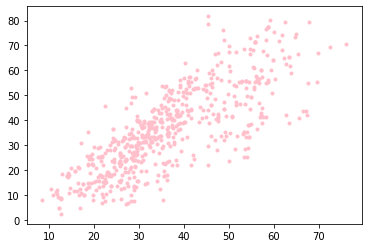

In [437]:
pred_train = model.predict(x_train)
plt.scatter(pred_train, y_train, marker='.', color='pink')

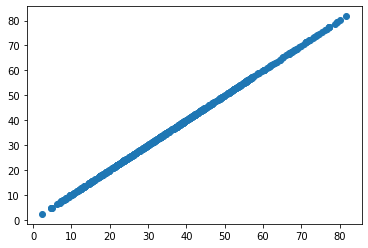

In [438]:
plt.scatter(model.y, y_train)

# Plotting Results of Cross-Validation

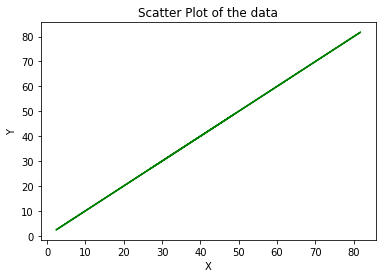

In [439]:
plt.plot(model.y, model.y,'g-')
plt.title("Scatter Plot of the data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

regression result: [30.88793631 44.77000564 24.50611293 23.51561525 23.36109243 60.93794567
 37.61312633 53.62592145 31.10080971 25.89750406 44.39704999 31.2354883
 50.00687284 39.26012267 32.05317735 31.71584032 35.18349023 52.43741616
 46.22168021 31.79928643 14.43746766 33.91714104 24.54520348 36.4380352
 47.87334468 37.25612818 36.18118203 49.69593342 23.30594874 27.70986172
 29.85623566 24.38927981 59.90260934 49.46045002 52.56047116 34.08893964
 32.85335487 49.05201056 29.45495976 48.01394154 54.70398798 43.69125393
 43.49300372 35.33158356 67.44835186 47.01056038 24.56386214 27.47168963
 12.57105538 31.30435081 37.01510323 34.50062359 46.40695327 25.65424718
 27.34921766 34.43659785 28.42809634 23.65582743 53.33618962 25.80614662
 38.83147159 21.70063018 43.10133239 28.68666385 47.63123736 28.06770398
 41.42878828 54.34717013 32.15690583 21.48128999 26.68805181 29.74024589
 36.41982756 29.04937874 45.99325921 31.82267831 29.86968365 22.00912353
 19.55252338 20.55109923 58.840644

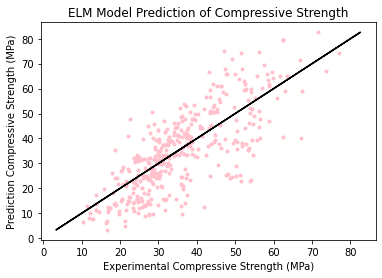

In [440]:
prediction = model.predict(x_test)
# Printing results
print("regression result:", prediction.reshape(-1, ))
print("regression score:", model.score(x_test, y_test))
model.y

plt.scatter(prediction, y_test, marker='.', color='pink')
plt.plot(y_test, y_test, 'black')
plt.title("ELM Model Prediction of Compressive Strength")
plt.xlabel("Experimental Compressive Strength (MPa)")
plt.ylabel("Prediction Compressive Strength (MPa)")
print(model.y.shape, y_test.shape)

In [441]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import sqrt

In [442]:
mse = mean_squared_error(y_test, prediction)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % sqrt(mse))
print(f"r2 Score Of Test Set : {r2_score(y_test, prediction)}")

MSE: 110.56
RMSE: 10.51
r2 Score Of Test Set : 0.58277623695714


# RMSE And R square

In [443]:
y_predict = model.predict(x_train)

mse = mean_squared_error(y_train, y_predict)
print(f"r2 Score Of Train Set : {r2_score(y_train, y_predict)}")
print("MSE: %.2f" % mse)
print("RMSE of train: %.2f" % sqrt(mse))

r2 Score Of Train Set : 0.6230753672356342
MSE: 107.07
RMSE of train: 10.35
